<a href="https://colab.research.google.com/github/sammatuba/AI-NLP-Codecamp/blob/master/Sentiment%20Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.classify import NaiveBayesClassifier

from nltk.corpus import movie_reviews
from nltk.corpus import stopwords
#from nltk.corpus import averaged_perceptron_tagger

import random
import nltk

import pandas as pd

In [9]:
nltk.download('stopwords')
nltk.download('movie_reviews')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [0]:
stopwords = stopwords.words("english")

In [11]:
print(movie_reviews.categories())

['neg', 'pos']


In [0]:
reviews = []

for label in movie_reviews.categories():
  for revID in movie_reviews.fileids(label):
    reviews.append((list(movie_reviews.words(revID)),label))
    
reviews_df = pd.DataFrame(reviews, columns=["words","label"])

In [25]:
reviews_df.head()

,words,label
0,"[plot, :, two, teen, couples, go, to, a, churc...",neg
1,"[the, happy, bastard, ', s, quick, movie, revi...",neg
2,"[it, is, movies, like, these, that, make, a, j...",neg
3,"["", quest, for, camelot, "", is, warner, bros, ...",neg
4,"[synopsis, :, a, mentally, unstable, man, unde...",neg


In [0]:
allowed_tag = ['N', 'J']
allwords = []
finalData = []

for review in reviews:
  text = review[0]
  text_tags = nltk.pos_tag(text)
  filteredText = []
  
  for word in text_tags:
    # filter to allowed tags (noun (N) and adjective (J)), if alphanumeric character, and if not a single character
    if word[1][0] in allowed_tag and word[0].isalpha() and len(word[0]) > 1:
      # append lower case allowed word to allwords
      allwords.append(word[0].lower())
      filteredText.append(word[0].lower())
    finalData.append((filteredText, review[1]))

In [35]:
allwords = nltk.FreqDist(allwords)
print(allwords)

<FreqDist with 31769 samples and 482072 outcomes>


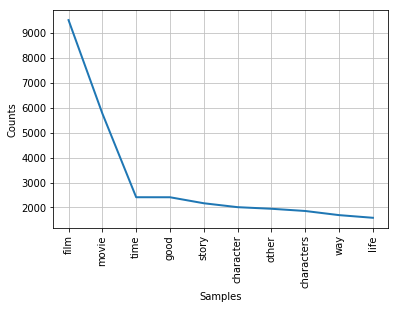

In [68]:
allwords.plot(10)

In [0]:
wordFeatures = (list(allwords.keys()))[:2000]

In [0]:
def getVectors(wordFeatures, document):
  features = {}
  
  for w in wordFeatures:
    features[w] = (w in document )
    
  return features

In [67]:
featuresets = [(getVectors(wordFeatures, rev), label) for (rev,label) in finalData]
random.shuffle(featuresets)

KeyboardInterrupt: ignored

In [0]:
print(len(featuresets[0][0]))

In [0]:
print(featuresets[:1])

In [0]:
train_data = featuresets[:1500]
test_data = featuresets[1500:0]

In [0]:
classifier = NaiveBayesClassifier.train(train_data)

In [0]:
accuracy = nltk.classify.accuracy(classifier, test_data)*100
print(accuracy)

In [0]:
classification = classifier.classify((getVectors(wordFeatures, comment)))

In [0]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer
from sklearn.model_selection import train_test_split

In [0]:
reviews = []
labels = []

for label in movie_reviews.categories():
  for revID in movie_reviews.fileids(label):
    reviews.append(' '.join(list(movie_reviews.words(revID))))
    labels.append(label)

In [46]:
print(reviews[0])

plot : two teen couples go to a church party , drink and then drive . they get into an accident . one of the guys dies , but his girlfriend continues to see him in her life , and has nightmares . what ' s the deal ? watch the movie and " sorta " find out . . . critique : a mind - fuck movie for the teen generation that touches on a very cool idea , but presents it in a very bad package . which is what makes this review an even harder one to write , since i generally applaud films which attempt to break the mold , mess with your head and such ( lost highway & memento ) , but there are good and bad ways of making all types of films , and these folks just didn ' t snag this one correctly . they seem to have taken this pretty neat concept , but executed it terribly . so what are the problems with the movie ? well , its main problem is that it ' s simply too jumbled . it starts off " normal " but then downshifts into this " fantasy " world in which you , as an audience member , have no idea

In [0]:
model_mulNB = Pipeline([('vect', CountVectorizer(ngram_range=(2,4), 
                                                 stop_words='english',
                                                 lowercase=True)), 
                        ('tfidf', TfidfTransformer()), 
                        ('Multinomial', MultinomialNB)])

In [0]:
X_train, X_test, y_train, y_test = train_test_split(reviews, labels, test_size=0.3)

In [0]:
# countvectorizer example
cv = CountVectorizer()
trainVectors = cv.fit_transform(X_train)

In [62]:
model_mulNB.fit(X_train, y_train)

TypeError: ignored

In [0]:
classification = model_mulNB.predict([comment])

In [0]:
from nltk.classify import SklearnClassifier
from sklearn.feature_selection import SelectKBest, chi2

In [0]:
model_mulNB2= Pipeline([
                        ('chi', SelectKBest(chi2, k=1000)),
                        ('tfidf', TfidfTransformer()), 
                        ('Multinomial', MultinomialNB)
                       ])

In [0]:
classifier = SklearnClassifier(model_mulNB2)

In [66]:
classifier.train(train_data)

NameError: ignored

In [0]:
cla